In [21]:
import logging
import os
import pandas as pd
import matplotlib.pyplot as plt
import workflow_steps as wflow
import workflow_steps_utils as utils

# Logger
logging.basicConfig(
    format='%(asctime)s,%(msecs)03d %(name)s %(levelname)s %(message)s',
    datefmt='%Y-%m-%d %H:%M:%S',
    level=logging.ERROR
)
logger = logging.getLogger("RootLogger") # Root logger

# Define model name constants
# Define step names
CONSTANTS = {
    'step_1': 'coupled_model_tortion',
    'step_2': 'coupled_model_adaptors',
    'step_3': 'coupled_decoupled',
    'step_4': 'local_cosim',
    'step_5': 'cosim_effects',
}


## Workflow Methods Description

### 1. Initialize Knowledge Graph (REQUIRED) 
Creates a `KnowledgeGraph` instance, and establishes a connection to the Ontology/Knwoledge graph

- i.e: `graph = wflow.KnowledgeGraph()`


### 2. Load models (REQUIRED)
Loads files associated with the model simulation by providing the name of the model to be loaded. Connects to the `KnowledgeGraph`, and retrieves the `sys` file names and output files the model produces. 

- i.e: `graph.load_models(MODEL_NAME)`


### 3. Run simulation (OPTIONAL)
Pass execute commands to the execute wrapper function, to generate simulation results. If the domain experts prefers, the commands could be executed in a different cell in the notebook. 

- i.e: `graph.run("omc example_model_file.mos", MODEL_FILE_DIRECTORY)`, the above code also be executed in a new notebook cell as:
- ` ! omc example_model_file.mos `, if the `MODEL_FILE_DIRECTORY` is not empty, the cell block becomes:
- ` %cd model_file_directory ! omc example_model_file.mos %cd ..` 

The method `graph.run('omc file.mos', 'directory')` hides the changing of directory command (`%cd directory ### %cd ..`) before execution of the `openModellica` or `Java` commands.


### 4. Compare models last execution timestamps (OPTIONAL)
Compares the model loaded in the step `graph.load_models(MODEL_NAME)` against the last execution timestamps from its dependent models, if dependent models exists.

- i.e: `graph.compare_prior_step_timestamp()`


### 5. Update models last execution timestamps (REQUIRED)
Updates the last execution timestamps of the model loaded in step `graph.load_models(MODEL_NAME)`.

- i.e: `graph.update_last_execution_timestamps()`


### 6. Delete OpenModelica files (OPTIONAL)
Delete all the files OpenModelica generates.

- i.e: `utils.delete_files_with_extension(_dir=MODEL_FILE_DIRECTORY)`

The extensions of the files to be deleted are hidden from the domain expert, in the utility constant `util.OMC_EXTENSIONS`. If new extensions or directory of the files are required, different parameterers can be passed to method as: `utils.delete_files_with_extension(extensions=[], _dir='')`


### 7. Validate model execution timestamps (OPTIONAL) 
Validated that model results are `recent`, the notion of recency is defined in the util wrapper function. This method validate that the files in the model are up to date before plotting them. The must be run to for each model simulation results.

- i.e: `graph.validate_model_last_execution_timestamps(MODEL_NAME)`



## Step 1: Model coupled system
- This step involves running a simulation of the coupled model, in order to establish a base line that will enable us to understand better the effects of de-coupling later.
- The coupled model is in the [coupled_model_tortion.mo](coupled_model_tortion.mo), to be open using Open Modelica.

### Outputs
- The following will load the model and run a simulation, storing the results in `./coupled_model_tortion_res.csv`


In [2]:
# Initialize
graph = wflow.KnowledgeGraph()

# 1. Initialize the step by providing the name of the step.
graph.initialize_step(CONSTANTS['step_1']) # REQUIRED

2025-06-24 14:28:20.507 INFO SimulateStep : The step contains the following model(s)/data: {'model1': 'coupled_model_tortion.mos'}


In [3]:
# 2. Run simulation
graph.run("omc run_coupled_model_tortion.mos")

true
false
record SimulationResult
    resultFile = "",
    simulationOptions = "startTime = 0.0, stopTime = 50.0, numberOfIntervals = 500, tolerance = 1e-6, method = 'dassl', fileNamePrefix = 'coupled_model_tortion', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
    messages = "Simulation Failed. Model: coupled_model_tortion does not exist! Please load it first before simulation.",
    timeFrontend = 0.0,
    timeBackend = 0.0,
    timeSimCode = 0.0,
    timeTemplates = 0.0,
    timeCompile = 0.0,
    timeSimulation = 0.0,
    timeTotal = 0.0
end SimulationResult;

2025-06-24 14:28:26.231 INFO SimulateStep : true
false
record SimulationResult
    resultFile = "",
    simulationOptions = "startTime = 0.0, stopTime = 50.0, numberOfIntervals = 500, tolerance = 1e-6, method = 'dassl', fileNamePrefix = 'coupled_model_tortion', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
    messages = "Simulation Failed. 

In [4]:
# 3. Compare models timestamps
graph.compare_prior_step_timestamp()

# 4. Update models timestamps
graph.update_last_execution_timestamps()

2025-06-24 14:28:28.276 INFO SimulateStep : coupled_model_tortion is the first step of the workflow!
2025-06-24 14:28:32.405 INFO SimulateStep : Successfully updated execution timestamps the step at 2025-06-24 14:28:28.277000


In [5]:
# 5. Delete OpenModelica files
utils.delete_files_with_extension(_dir='.')

2025-06-24 14:28:36.584 ERROR SimulateStep : Simulation result for 'coupled_model_tortion_res.csv' is older than 300 seconds.


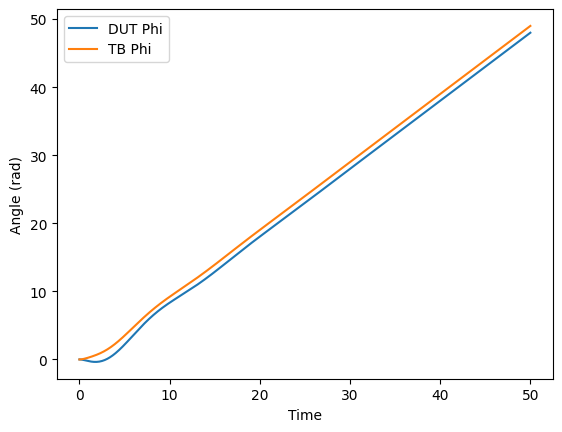

In [6]:
## Plotting data notebook
# 7. Validate
graph.validate_model_last_execution_timestamps()

tortion_df = pd.read_csv('coupled_model_tortion_res.csv')

plt.plot(tortion_df["time"], tortion_df['dut_turbine.phi'], label='DUT Phi')
plt.plot(tortion_df["time"], tortion_df['testbench_inertia.phi'], label='TB Phi')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()

## Step 2 (Optional): Model de-coupled effects on coupled model

This step involves modelling the coupling mechanism between the models, if the language permits that hierarchical representing models and decoupling them.

In this case, it does, and the [model](coupled_model_adaptors_full.mo) looks like:


Notice the adapters that restrict the causality in the linkage between the models.

### Run a simulation and store results

In [7]:
# Initialize
graph = wflow.KnowledgeGraph()

# 1. Initialize the step by providing the name of the step.
graph.initialize_step(CONSTANTS['step_2']) # REQUIRED

2025-06-24 14:28:45.033 INFO SimulateStep : The step contains the following model(s)/data: {'model2': 'coupled_model_adaptors_full.mos'}


In [8]:
# 2. Run simulation
graph.run("omc coupled_model_adaptors_full.mos")

true
true
record SimulationResult
    resultFile = "C:/Users/carlos.pambo/Desktop/PhD/2023.IncubatorOnto/code/2025.EDTConf.Reproducibility/coupled_model_adaptors_full_res.csv",
    simulationOptions = "startTime = 0.0, stopTime = 50.0, numberOfIntervals = 500, tolerance = 1e-6, method = 'dassl', fileNamePrefix = 'coupled_model_adaptors_full', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
    messages = "LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.
",
    timeFrontend = 0.1157518,
    timeBackend = 0.0169389,
    timeSimCode = 0.0039299,
    timeTemplates = 0.0215964,
    timeCompile = 3.5938714,
    timeSimulation = 0.227829,
    timeTotal = 3.980877
end SimulationResult;

2025-06-24 14:28:54.937 INFO SimulateStep : true
true
record SimulationResult
    resultFile = "C:/Users/carlos.pambo/Desktop/PhD/2023.IncubatorOnto/code/202

In [9]:
# 3. Compare models timestamps
graph.compare_prior_step_timestamp()

# 4. Update models timestamps
graph.update_last_execution_timestamps()

2025-06-24 14:28:57.008 INFO SimulateStep : Comparing model(s) last execution timestamp in step coupled_model_adaptors with model(s) in the previous step in the workflow!
2025-06-24 14:29:05.277 INFO SimulateStep : Successfully updated execution timestamps the step at 2025-06-24 14:29:01.151000


In [10]:
# 5. Delete OpenModelica files
utils.delete_files_with_extension(_dir='.')

2025-06-24 14:29:09.467 ERROR SimulateStep : Simulation result for 'coupled_model_adaptors_full_res.csv' is older than 300 seconds.


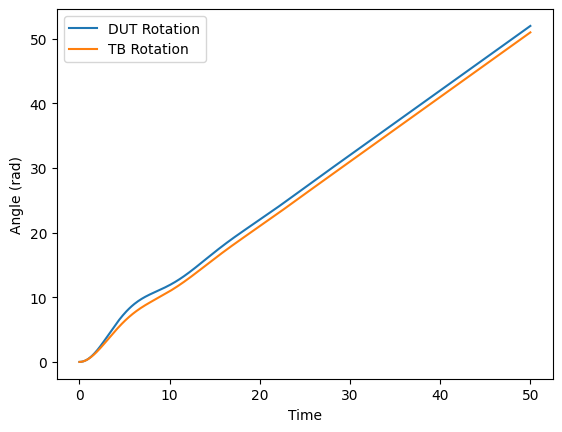

In [11]:
## Plotting data notebook
# 7. Validate
graph.validate_model_last_execution_timestamps()

adaptor_df = pd.read_csv("coupled_model_adaptors_full_res.csv")

plt.plot(adaptor_df["time"], adaptor_df['dut_turbine.phi'], label='DUT Rotation')
plt.plot(adaptor_df["time"], adaptor_df['testbench_inertia.phi'], label='TB Rotation')

plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.savefig("coupled_model_adaptors_full_res.pdf")
plt.show()

2025-06-24 14:29:14.572 ERROR SimulateStep : Simulation result for 'coupled_model_adaptors_full_res.csv' is older than 300 seconds.


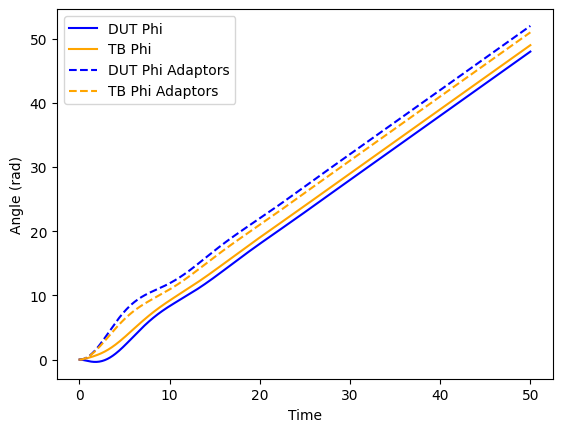

In [12]:
# Compare the two results
# 7. Validate
graph.validate_model_last_execution_timestamps()

tortion_df = pd.read_csv('coupled_model_tortion_res.csv')
adaptor_df = pd.read_csv("coupled_model_adaptors_full_res.csv")

plt.plot(tortion_df["time"], tortion_df['dut_turbine.phi'], label='DUT Phi', color='blue')
plt.plot(tortion_df["time"], tortion_df['testbench_inertia.phi'], label='TB Phi', color='orange')

plt.plot(adaptor_df["time"], adaptor_df['dut_turbine.phi'], linestyle="--", label='DUT Phi Adaptors', color='blue')
plt.plot(adaptor_df["time"], adaptor_df['testbench_inertia.phi'], linestyle="--", label='TB Phi Adaptors', color='orange')

plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()


## Step 3 (Optional): Model de-coupled hierarchical model

The next step is to create a decoupled model in the host language. The goal is to clearly lay the interface of each sub model.

It is a set of models, one representing the [top level](decoupled_model/coupled_decoupled.mo), and the rest representing each unit: [DUT](decoupled_model/dut.mo), [Input](decoupled_model/set_input.mo), and [TestBench](decoupled_model/test_bench.mo).

These will later become FMUs, but for now I think they are just inlined by the tool. 

Top Level:

TestBench:

DUT:


In [16]:
# Initialize
graph = wflow.KnowledgeGraph()

# 1. Initialize the step by providing the name of the step.
graph.initialize_step(CONSTANTS['step_3']) # REQUIRED


2025-06-24 14:34:59.137 INFO SimulateStep : The step contains the following model(s)/data: {'model3': 'coupled_decoupled.mo'}


In [17]:
# 2. Run simulation
graph.run(_command="omc run_coupled_decoupled.mos", _dir='decoupled_model')

# 3. Compare models timestamps
graph.compare_prior_step_timestamp()

# 4. Update models timestamps
graph.update_last_execution_timestamps()

true
true
true
true
true
record SimulationResult
    resultFile = "C:/Users/carlos.pambo/Desktop/PhD/2023.IncubatorOnto/code/2025.EDTConf.Reproducibility/decoupled_model/coupled_decoupled_res.csv",
    simulationOptions = "startTime = 0.0, stopTime = 50.0, numberOfIntervals = 500, tolerance = 1e-6, method = 'dassl', fileNamePrefix = 'coupled_decoupled', options = '', outputFormat = 'csv', variableFilter = '.*', cflags = '', simflags = ''",
    messages = "LOG_SUCCESS       | info    | The initialization finished successfully without homotopy method.
LOG_SUCCESS       | info    | The simulation finished successfully.
",
    timeFrontend = 0.0546353,
    timeBackend = 0.0288544,
    timeSimCode = 0.0099497,
    timeTemplates = 0.030139,
    timeCompile = 3.6619186,
    timeSimulation = 0.2679255,
    timeTotal = 4.0553083
end SimulationResult;

2025-06-24 14:35:09.300 INFO SimulateStep : true
true
true
true
true
record SimulationResult
    resultFile = "C:/Users/carlos.pambo/Desktop/PhD/

In [18]:
# 5. Delete OpenModelica files
utils.delete_files_with_extension(_dir='decoupled_model')


2025-06-24 14:35:31.054 ERROR SimulateStep : Simulation result for 'coupled_model_adaptors_full_res.csv' is older than 300 seconds.
2025-06-24 14:35:31.056 ERROR SimulateStep : Simulation result for 'decoupled_model/coupled_decoupled_res.csv' is older than 300 seconds.


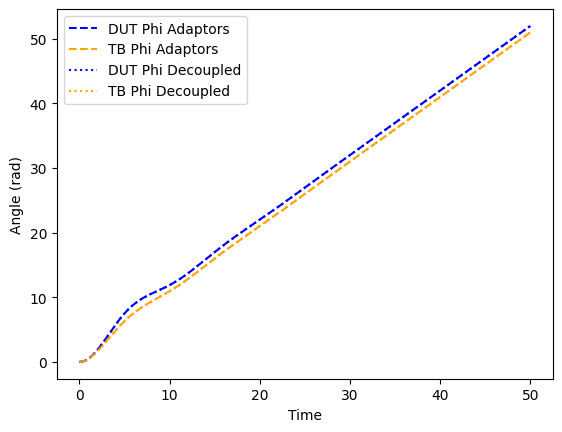

In [19]:
## Plotting data notebook
# 7. Validate
graph.validate_model_last_execution_timestamps()

decoupled_df = pd.read_csv("decoupled_model/coupled_decoupled_res.csv")
adaptors_df = pd.read_csv("coupled_model_adaptors_full_res.csv")

plt.plot(adaptors_df["time"], adaptors_df['dut_turbine.phi'], linestyle="--", label='DUT Phi Adaptors', color='blue')
plt.plot(adaptors_df["time"], adaptors_df['testbench_inertia.phi'], linestyle="--", label='TB Phi Adaptors', color='orange')
plt.plot(decoupled_df["time"], decoupled_df['dut.dut_turbine.phi'], label='DUT Phi Decoupled', linestyle="dotted", color='blue')
plt.plot(decoupled_df["time"], decoupled_df['testBench.testbench_inertia.phi'], linestyle="dotted", label='TB Phi Decoupled', color='orange')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()


## Step 4: Co-simulation with modelica fmus

This step runs the co-simulation with FMUs. These have been exported with open modelica.

The scenario is the same as in the previous model, except now with FMUs.

In [22]:
# Initialize
graph = wflow.KnowledgeGraph()

# 1. Initialize the step by providing the name of the step.
graph.initialize_step(CONSTANTS['step_4']) # REQUIRED

2025-06-24 14:39:21.942 INFO SimulateStep : The step contains the following model(s)/data: {'model4': 'cosim_modelica/local_cosim.json'}


In [23]:
# 2. Run simulation
graph.run(_command=f"java -jar .\\maestro.jar import Sg1 -output=results -v --interpret --fmu-search-path FMUs local_cosim.json", _dir='cosim_modelica')

14:39:33.306 [main] DEBUG org.intocps.maestro.Mabl - Frameworks: [FMI2]
14:39:33.394 [main] INFO  org.intocps.maestro.MablSpecificationGenerator - Module definitions: [ Math , DataWriter , Logger , CSV , CSVFile , VariableStep , RealTime , DerivativeEstimator , DerivativeEstimatorInstance , ConsolePrinter , SimulationControl , ArrayUtil , FMI2 , FMI2Component , BooleanLogic , MEnv ]
14:39:33.399 [main] INFO  org.intocps.maestro.MablSpecificationGenerator - Contains simulation modules: 1
14:39:33.400 [main] INFO  org.intocps.maestro.MablSpecificationGenerator - 	Imports [ JacobianStepBuilder , Initializer , DebugLogging , TypeConverter , DataWriter , FMI2 , Math , ArrayUtil , Logger , BooleanLogic , MEnv ]
14:39:33.561 [main] INFO  org.reflections.Reflections - Reflections took 128 ms to scan 1 urls, producing 197 keys and 613 values 
14:39:33.620 [main] DEBUG org.intocps.maestro.MablSpecificationGenerator - Located plugins: JacobianStepBuilder - 0.1.1
14:39:33.621 [main] DEBUG org.into

In [24]:
# 3. Compare models timestamps
graph.compare_prior_step_timestamp()

# 4. Update models timestamps
graph.update_last_execution_timestamps()

2025-06-24 14:39:48.746 INFO SimulateStep : Comparing model(s) last execution timestamp in step local_cosim with model(s) in the previous step in the workflow!
2025-06-24 14:39:57.057 INFO SimulateStep : Successfully updated execution timestamps the step at 2025-06-24 14:39:52.910000


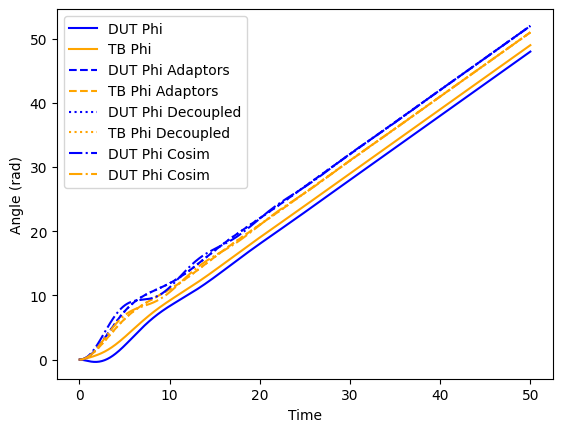

In [25]:
## Plotting data notebook
# 7. Validate
graph.validate_model_last_execution_timestamps()

# Assert files exist before loading them
assert(os.path.exists("coupled_model_tortion_res.csv"))
assert(os.path.exists("coupled_model_adaptors_full_res.csv"))
assert(os.path.exists("decoupled_model/coupled_decoupled_res.csv"))
assert(os.path.exists("cosim_modelica/results/outputs.csv"))

tortion_df = pd.read_csv("coupled_model_tortion_res.csv")
adaptors_df = pd.read_csv("coupled_model_adaptors_full_res.csv")
decoupled_df = pd.read_csv("decoupled_model/coupled_decoupled_res.csv")
cosim_df = pd.read_csv("cosim_modelica/results/outputs.csv")

plt.plot(tortion_df["time"], tortion_df['dut_turbine.phi'], label='DUT Phi', color='blue')
plt.plot(tortion_df["time"], tortion_df['testbench_inertia.phi'], label='TB Phi', color='orange')

plt.plot(adaptors_df["time"], adaptors_df['dut_turbine.phi'], linestyle="--", label='DUT Phi Adaptors', color='blue')
plt.plot(adaptors_df["time"], adaptors_df['testbench_inertia.phi'], linestyle="--", label='TB Phi Adaptors', color='orange')

plt.plot(decoupled_df["time"], decoupled_df['dut.dut_turbine.phi'], label='DUT Phi Decoupled', linestyle="dotted", color='blue')
plt.plot(decoupled_df["time"], decoupled_df['testBench.testbench_inertia.phi'], linestyle="dotted", label='TB Phi Decoupled', color='orange')

plt.plot(cosim_df["time"], cosim_df["{Dut}.dut.out_angle"], label='DUT Phi Cosim', linestyle="dashdot", color='blue')
plt.plot(cosim_df["time"], cosim_df["{TestBench}.tb.out_angle_inertia"], label='DUT Phi Cosim', linestyle="dashdot", color='orange')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()

## Step 5: Study of Co-simulation Effects in Model

The idea for this step is to plot the effect of decreasing simulation step sizes on the error of the co-simulation against the baseline.

The error could be computed automatically, but it is common that domain experts will visually inspect it beforehand.

In [26]:
# Initialize
graph = wflow.KnowledgeGraph()

# Initialize the step by providing the name of the step.
graph.initialize_step(CONSTANTS['step_5']) # REQUIRED

2025-06-24 14:40:18.674 INFO SimulateStep : The step contains the following model(s)/data: {'model4': 'cosim_modelica/local_cosim.json'}


In [ ]:
# Run simulation
graph.run(_command="java -jar .\\maestro.jar import Sg1 -output=results -v --interpret --fmu-search-path FMUs local_cosim_gen.json", _dir='cosim_modelica')

In [ ]:
# Compare models timestamps
graph.compare_prior_step_timestamp()

# Update models timestamps
graph.update_last_execution_timestamps()

In [ ]:
# Validate
graph.validate_model_last_execution_timestamps()

# Assert files exist before loading them
assert(os.path.exists("coupled_model_tortion_res.csv"))
assert(os.path.exists("coupled_model_adaptors_full_res.csv"))
assert(os.path.exists("decoupled_model/coupled_decoupled_res.csv"))
assert(os.path.exists("cosim_modelica/results/outputs.csv"))

tortion_df = pd.read_csv("coupled_model_tortion_res.csv")
adaptors_df = pd.read_csv("coupled_model_adaptors_full_res.csv")
decoupled_df = pd.read_csv("decoupled_model/coupled_decoupled_res.csv")
cosim_df = pd.read_csv("cosim_modelica/results/outputs.csv")

## Plotting data notebook
plt.plot(tortion_df["time"], tortion_df['dut_turbine.phi'], label='DUT Phi', color='blue')
plt.plot(tortion_df["time"], tortion_df['testbench_inertia.phi'], label='TB Phi', color='orange')

plt.plot(adaptors_df["time"], adaptors_df['dut_turbine.phi'], linestyle="--", label='DUT Phi Adaptors', color='blue')
plt.plot(adaptors_df["time"], adaptors_df['testbench_inertia.phi'], linestyle="--", label='TB Phi Adaptors', color='orange')

plt.plot(decoupled_df["time"], decoupled_df['dut.dut_turbine.phi'], label='DUT Phi Decoupled', linestyle="dotted", color='blue')
plt.plot(decoupled_df["time"], decoupled_df['testBench.testbench_inertia.phi'], linestyle="dotted", label='TB Phi Decoupled', color='orange')

plt.plot(cosim_df["time"], cosim_df["{Dut}.dut.out_angle"], label='DUT Phi Cosim', linestyle="dashdot", color='blue')
plt.plot(cosim_df["time"], cosim_df["{TestBench}.tb.out_angle_inertia"], label='DUT Phi Cosim', linestyle="dashdot", color='orange')

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.show()
